In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

Import Library

In [5]:
df=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')

Load dataset

In [6]:
df1=df.copy()
df1

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df1.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

check the datatypes of  feature 

In [8]:
df1=df1[["Price","Age_08_04","KM","HP","cc","Gears","Quarterly_Tax","Automatic_airco","Automatic","Cylinders","Powered_Windows","Sport_Model","Backseat_Divider"]]

select imoortant random  feature from dataset

In [9]:
df1

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Automatic_airco,Automatic,Cylinders,Powered_Windows,Sport_Model,Backseat_Divider
0,13500,23,46986,90,2000,5,210,0,0,4,1,0,1
1,13750,23,72937,90,2000,5,210,0,0,4,0,0,1
2,13950,24,41711,90,2000,5,210,0,0,4,0,0,1
3,14950,26,48000,90,2000,5,210,0,0,4,0,0,1
4,13750,30,38500,90,2000,5,210,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,5,69,0,0,4,1,1,1
1432,10845,72,19000,86,1300,5,69,0,0,4,0,1,1
1433,8500,71,17016,86,1300,5,69,0,0,4,0,0,1
1434,7250,70,16916,86,1300,5,69,0,0,4,0,0,1


In [10]:
#df2=pd.get_dummies(df1,columns=["Color"])

In [11]:
df2=df1.copy()

In [12]:
df2.describe()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Automatic_airco,Automatic,Cylinders,Powered_Windows,Sport_Model,Backseat_Divider
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,5.026462,87.122563,0.056407,0.055710,4.0,0.561978,0.300139,0.770195
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.188510,41.128611,0.230786,0.229441,0.0,0.496317,0.458478,0.420854
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,3.000000,19.000000,0.000000,0.000000,4.0,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,5.000000,69.000000,0.000000,0.000000,4.0,0.000000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,5.000000,85.000000,0.000000,0.000000,4.0,1.000000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,85.000000,0.000000,0.000000,4.0,1.000000,1.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,6.000000,283.000000,1.000000,1.000000,4.0,1.000000,1.000000,1.000000


In [13]:
df2.corr()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Automatic_airco,Automatic,Cylinders,Powered_Windows,Sport_Model,Backseat_Divider
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.063104,0.219197,0.588262,0.033081,NaN,0.356518,0.164121,0.102569
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.005364,-0.198431,-0.426259,0.031717,NaN,-0.283856,-0.110988,-0.116751
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,0.015023,0.278165,-0.258221,-0.081854,NaN,-0.156242,-0.044784,-0.045658
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.209477,-0.298432,0.244957,0.013144,NaN,0.265593,-0.006027,0.010908
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.014629,0.306996,0.162669,0.066740,NaN,0.055299,-0.035195,-0.055711
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,1.000000,-0.005452,0.077791,-0.098555,NaN,0.131423,0.174117,0.076705
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,-0.005452,1.000000,0.123125,-0.055371,NaN,0.003827,0.067525,0.198419
Automatic_airco,0.588262,-0.426259,-0.258221,0.244957,0.162669,0.077791,0.123125,1.000000,0.059057,NaN,0.203687,0.215287,0.018756
Automatic,0.033081,0.031717,-0.081854,0.013144,0.066740,-0.098555,-0.055371,0.059057,1.000000,NaN,-0.005864,0.013175,-0.018876
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Features are highly correlated to target 

feature and feature correlation is lesss

In [14]:
#sns.pairplot(df2)
#plt.show()

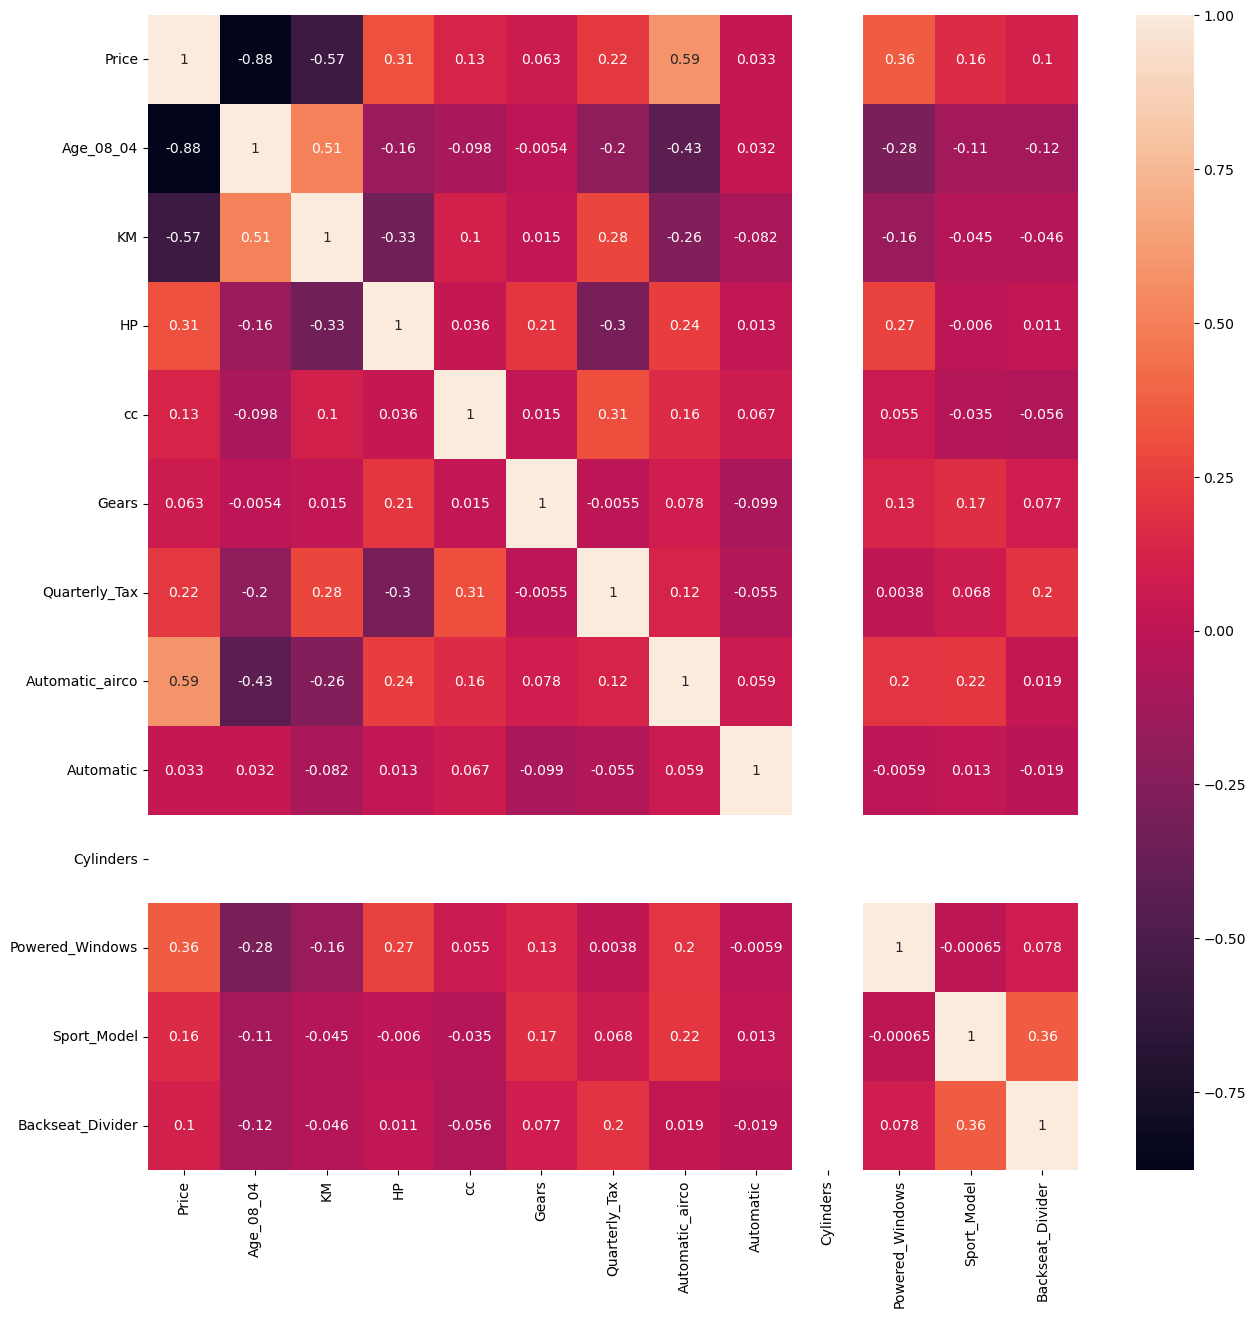

In [15]:
plt.figure(figsize=(15,15))
corr=df2.corr()
sns.heatmap(corr,annot=True,)
plt.show()

heatmps represent visualisation of correlaation matrix

1. correlation between price and age of car is negatively correlated.so the impact of age of car in model prediction is less

2.price is positively correlated with Automatic air condition so the impact on model prediction is high

In [16]:
df2.dtypes

Price               int64
Age_08_04           int64
KM                  int64
HP                  int64
cc                  int64
Gears               int64
Quarterly_Tax       int64
Automatic_airco     int64
Automatic           int64
Cylinders           int64
Powered_Windows     int64
Sport_Model         int64
Backseat_Divider    int64
dtype: object

datatypes of selected features

# Model perparing

In [17]:
x=pd.DataFrame(df2.iloc[:,1:])
y=pd.DataFrame(df2.iloc[:,0])

data split into features and target

and store in x and y variable 

In [18]:
x

,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Automatic_airco,Automatic,Cylinders,Powered_Windows,Sport_Model,Backseat_Divider
0,23,46986,90,2000,5,210,0,0,4,1,0,1
1,23,72937,90,2000,5,210,0,0,4,0,0,1
2,24,41711,90,2000,5,210,0,0,4,0,0,1
3,26,48000,90,2000,5,210,0,0,4,0,0,1
4,30,38500,90,2000,5,210,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,5,69,0,0,4,1,1,1
1432,72,19000,86,1300,5,69,0,0,4,0,1,1
1433,71,17016,86,1300,5,69,0,0,4,0,0,1
1434,70,16916,86,1300,5,69,0,0,4,0,0,1


In [19]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [20]:
model=smf.ols("y~x",data=df2).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     953.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:31:38   Log-Likelihood:                -12282.
No. Observations:                1436   AIC:                         2.459e+04
Df Residuals:                    1424   BIC:                         2.465e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    766.7864     54.415     14.091      0.000     660.045     873.528
x[0]        -120.7318      2.447    -49.336      0.000    -125.532    -115.931
x[1]          -0.0188      0.001    -15.896      0.000      -0.021      -0.017
x[2]          33.3571      2.630     12.684      0.000      28.198      38.516
x[3]          -0.1105      0.085     -1.301      0.194      -0.277       0.056
x[4]         161.1540    186.072      0.866      0.387    -203.850     526.158
x[5]          15.7684      1.022     15.424      0.000      13.763      17.774
x[6]        3029.2469    170.184     17.800      0.000    2695.408    3363.086
x[7]         540.6598    147.707      3.660      0.000     250.913     830.407
x[8]        3067.1456    217.659     14.091      0.000    2640.178    3494.113
x[9]         562.6901     72.595      7.751      0.000     420.286     705.094
x[10]        371.1203     81.408      4.559      0.000     211.428     530.812
x[11]       -368.2215     88.115     -4.179      0.000    -541.070    -195.373
==============================================================================
Omnibus:                      159.585   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.203
Skew:                           0.499   Prob(JB):                    6.90e-129
Kurtosis:                       5.978   Cond. No.                     4.97e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From OLS Assumptions,

1.we get a feature importance from p value that is pvalue<0.05 then the feature is important 

2.from this assumptions we get coefficient value and standard error 

3. we get model performace (r2 score and,adj_r2 score)

# VIF

In [425]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif[["VIF Factor"]]

,VIF Factor
0,1.876496
1,1.787610
2,1.405912
3,1.176627
4,1.114395
5,1.601257
6,1.397218
7,1.040290
8,775.607908
9,1.175807


In [426]:
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,1.9,Age_08_04
1,1.8,KM
2,1.4,HP
3,1.2,cc
4,1.1,Gears
5,1.6,Quarterly_Tax
6,1.4,Automatic_airco
7,1.0,Automatic
8,775.6,Cylinders
9,1.2,Powered_Windows


variance influence factor (VIF)

1.we get a feature importance 

In [432]:
x1=df2[["Age_08_04","KM","HP","Quarterly_Tax","Automatic_airco","Cylinders","Sport_Model","Powered_Windows","Backseat_Divider","Gears"]]

In [433]:
model_vif=smf.ols("y~x1",data=df2).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1154.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:10:15   Log-Likelihood:                -12289.
No. Observations:                1436   AIC:                         2.460e+04
Df Residuals:                    1426   BIC:                         2.465e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    781.6646     54.131     14.440      0.000     675.480     887.849
x1[0]       -119.7835      2.445    -48.996      0.000    -124.579    -114.988
x1[1]         -0.0194      0.001    -16.400      0.000      -0.022      -0.017
x1[2]         32.8389      2.621     12.527      0.000      27.697      37.981
x1[3]         15.3681      0.986     15.592      0.000      13.435      17.302
x1[4]       3053.9292    169.643     18.002      0.000    2721.152    3386.706
x1[5]       3126.6584    216.523     14.440      0.000    2701.921    3551.396
x1[6]        382.1769     81.673      4.679      0.000     221.966     542.388
x1[7]        564.6169     72.898      7.745      0.000     421.618     707.616
x1[8]       -359.2780     88.000     -4.083      0.000    -531.901    -186.655
x1[9]         93.6503    185.907      0.504      0.615    -271.031     458.332
==============================================================================
Omnibus:                      154.065   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.015
Skew:                           0.490   Prob(JB):                    3.68e-120
Kurtosis:                       5.869   Cond. No.                     4.72e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.93e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Residual Analysis

In [434]:
r=model_vif.resid
r

0      -2980.327659
1      -1663.472019
2      -1948.016189
3       -586.735962
4      -2056.075626
           ...     
1431   -2065.952788
1432    2173.133043
1433      52.129354
1434   -1319.589489
1435   -1607.260122
Length: 1436, dtype: float64

we found error from actual and predicted value

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


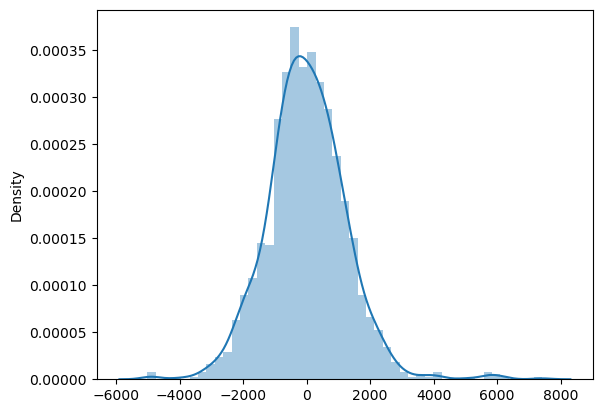

In [435]:
sns.distplot(r)
plt.show()

Error is Normally distributed in this distplot

# Residual plot

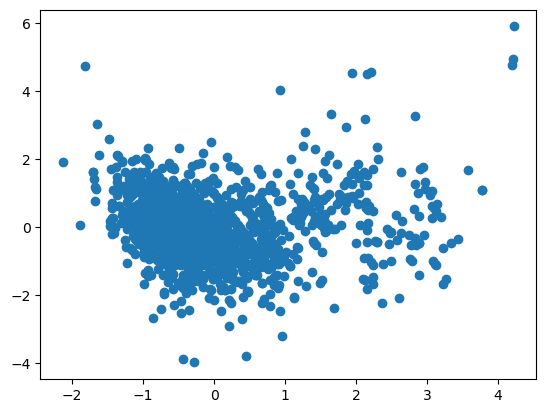

In [436]:
sc=StandardScaler()
sc_red=sc.fit_transform(model_vif.resid.array.reshape(-1, 1))
sc_pred=sc.fit_transform(model_vif.fittedvalues.array.reshape(-1, 1))
plt.scatter(sc_pred,sc_red)
plt.show()

scatter plot shows us ,the predicted value and error has no pattern

# COOKS DISTANCE

In [22]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

Cooks distance shows a highest influence of data point in datasets

In [438]:
c

array([4.57627595e-03, 1.53057236e-03, 2.21828538e-03, ...,
       4.26712669e-06, 5.93393922e-04, 1.09964645e-03])

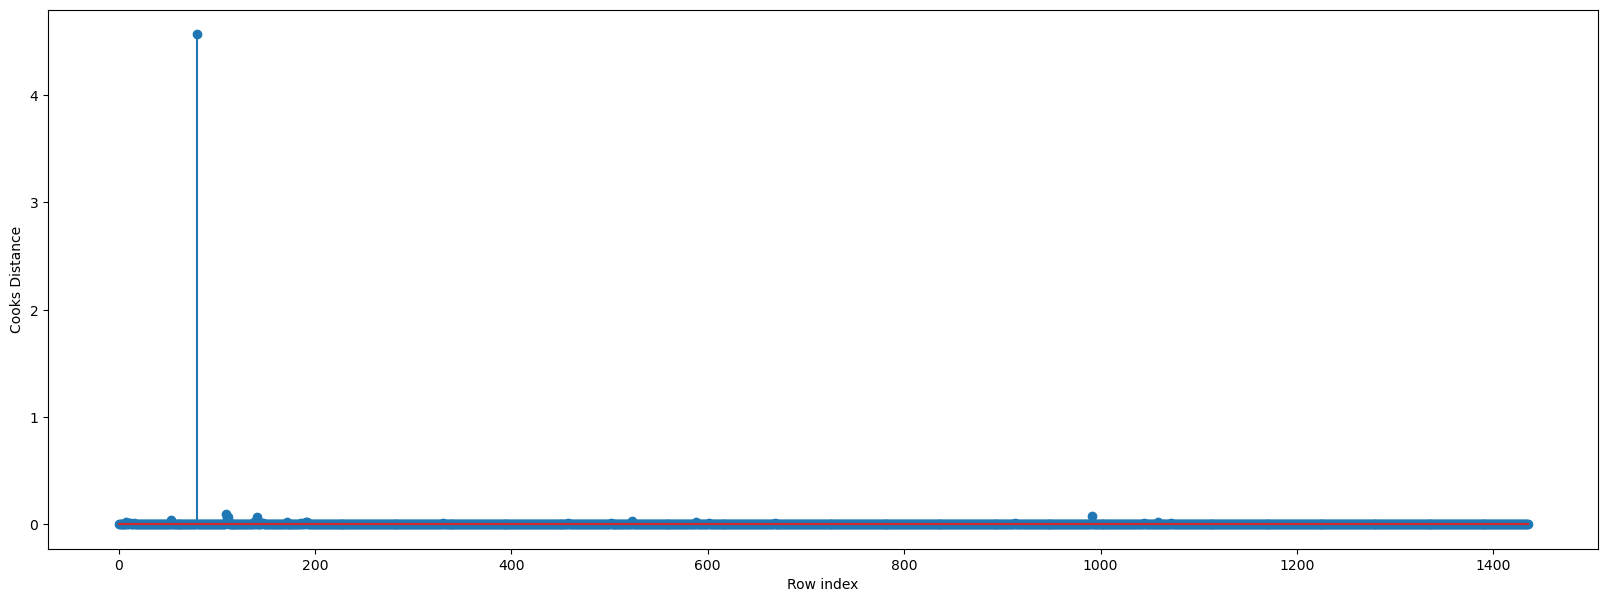

In [439]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


stem visualize highest influence datapoint

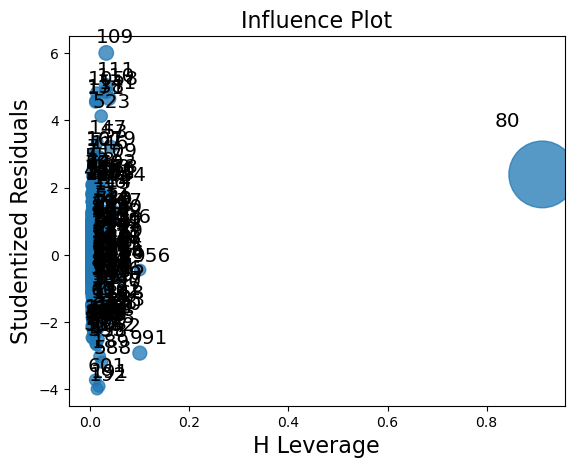

In [440]:
model_influence.plot_influence()


In [441]:
np.argmax(c),np.max(c)

(80, 4.569207580957864)

argmax get a hight influence data point and np.max give us maximum value of residual

# Final Model

After all this Assumptions and test we create a best model fpr this dataset

In [442]:
new_df=df2.drop(df2.index[[80]])
new_df

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Automatic_airco,Automatic,Cylinders,Powered_Windows,Sport_Model,Backseat_Divider
0,13500,23,46986,90,2000,5,210,0,0,4,1,0,1
1,13750,23,72937,90,2000,5,210,0,0,4,0,0,1
2,13950,24,41711,90,2000,5,210,0,0,4,0,0,1
3,14950,26,48000,90,2000,5,210,0,0,4,0,0,1
4,13750,30,38500,90,2000,5,210,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,5,69,0,0,4,1,1,1
1432,10845,72,19000,86,1300,5,69,0,0,4,0,1,1
1433,8500,71,17016,86,1300,5,69,0,0,4,0,0,1
1434,7250,70,16916,86,1300,5,69,0,0,4,0,0,1


drop highest influence Index in dataset

In [443]:
new_x=new_df.iloc[:,1:]
new_y=new_df.iloc[:,0]

In [444]:
final_model=smf.ols("new_y~new_x",data=new_df).fit()

In [445]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  new_y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     953.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:10:51   Log-Likelihood:                -12271.
No. Observations:                1435   AIC:                         2.457e+04
Df Residuals:                    1423   BIC:                         2.463e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    802.8409     56.369     14.243      0.000     692.266     913.416
new_x[0]    -121.1630      2.450    -49.461      0.000    -125.968    -116.358
new_x[1]      -0.0180      0.001    -14.704      0.000      -0.020      -0.016
new_x[2]      36.0825      2.861     12.611      0.000      30.470      41.695
new_x[3]      -0.7555      0.282     -2.678      0.008      -1.309      -0.202
new_x[4]     149.2195    185.829      0.803      0.422    -215.309     513.748
new_x[5]      17.9050      1.355     13.213      0.000      15.247      20.563
new_x[6]    3029.5114    169.902     17.831      0.000    2696.227    3362.796
new_x[7]     521.5129    147.678      3.531      0.000     231.823     811.203
new_x[8]    3211.3636    225.475     14.243      0.000    2769.064    3653.663
new_x[9]     566.2288     72.489      7.811      0.000     424.032     708.426
new_x[10]    364.2860     81.322      4.480      0.000     204.761     523.811
new_x[11]   -412.6486     89.900     -4.590      0.000    -589.000    -236.297
==============================================================================
Omnibus:                      165.265   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.580
Skew:                           0.525   Prob(JB):                    1.42e-131
Kurtosis:                       5.996   Cond. No.                     5.23e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

we get the highest performance of model like 88.1%